In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'

# Brewing beer

How to find the best recipe for a new beer without brewing a large number of trial batches?

In [2]:
from utils import beer_score

def inverse_beer_score(points):
    return -1. * beer_score(points)

In [3]:
budget = 50

bounds = [(2., 14.), (5., 80.)]

# Bayesian beer optimisation

In [4]:
from skopt import plots

In [5]:
from skopt import gp_minimize

In [6]:
res = gp_minimize(inverse_beer_score, bounds,
                  n_calls=budget,
                  n_random_starts=20,
                  random_state=2)

In [7]:
print("best recipe (alcohol, bitterness): %.2f, %.2f" % (res.x[0], res.x[1]))
print("with a score of: %.4f" % res.fun)

best recipe (alcohol, bitterness): 5.10, 12.55
with a score of: -0.9933


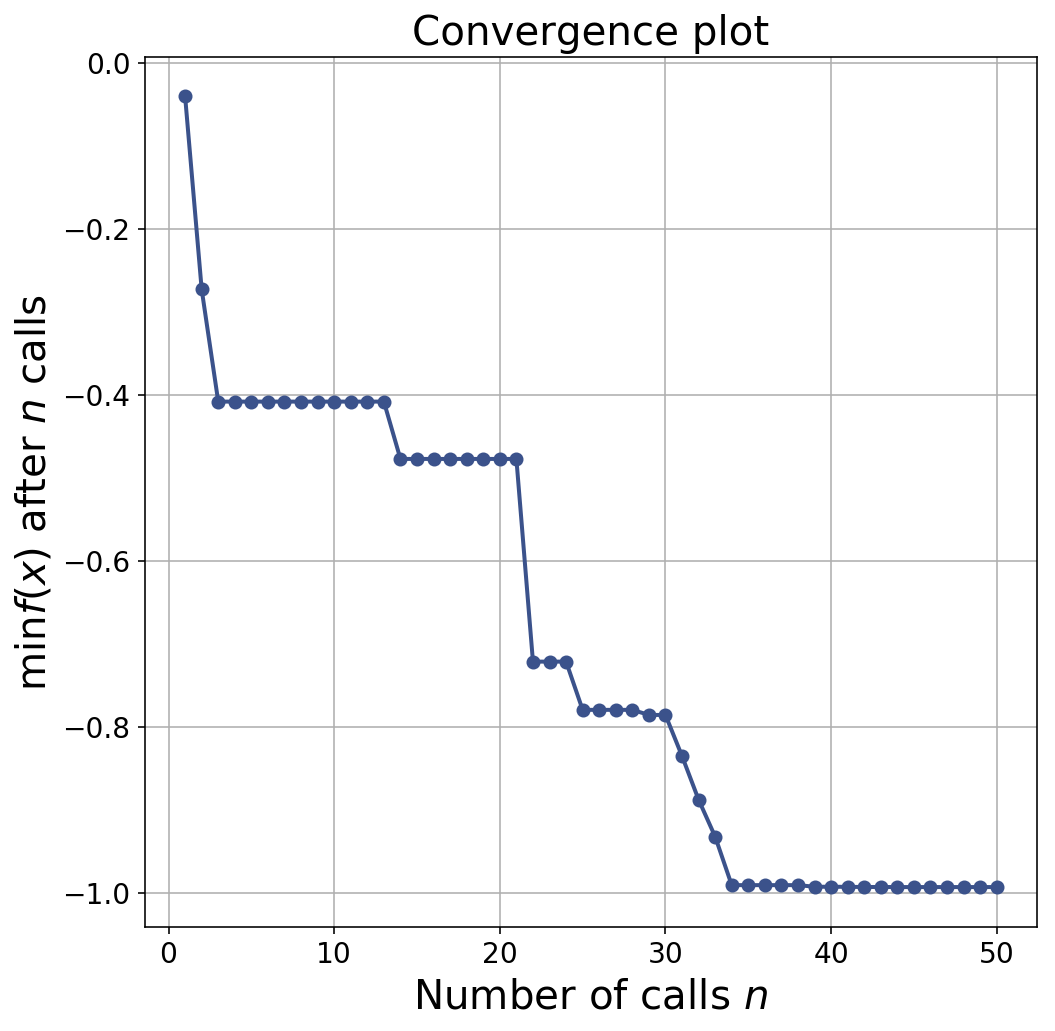

In [8]:
plots.plot_convergence(res);

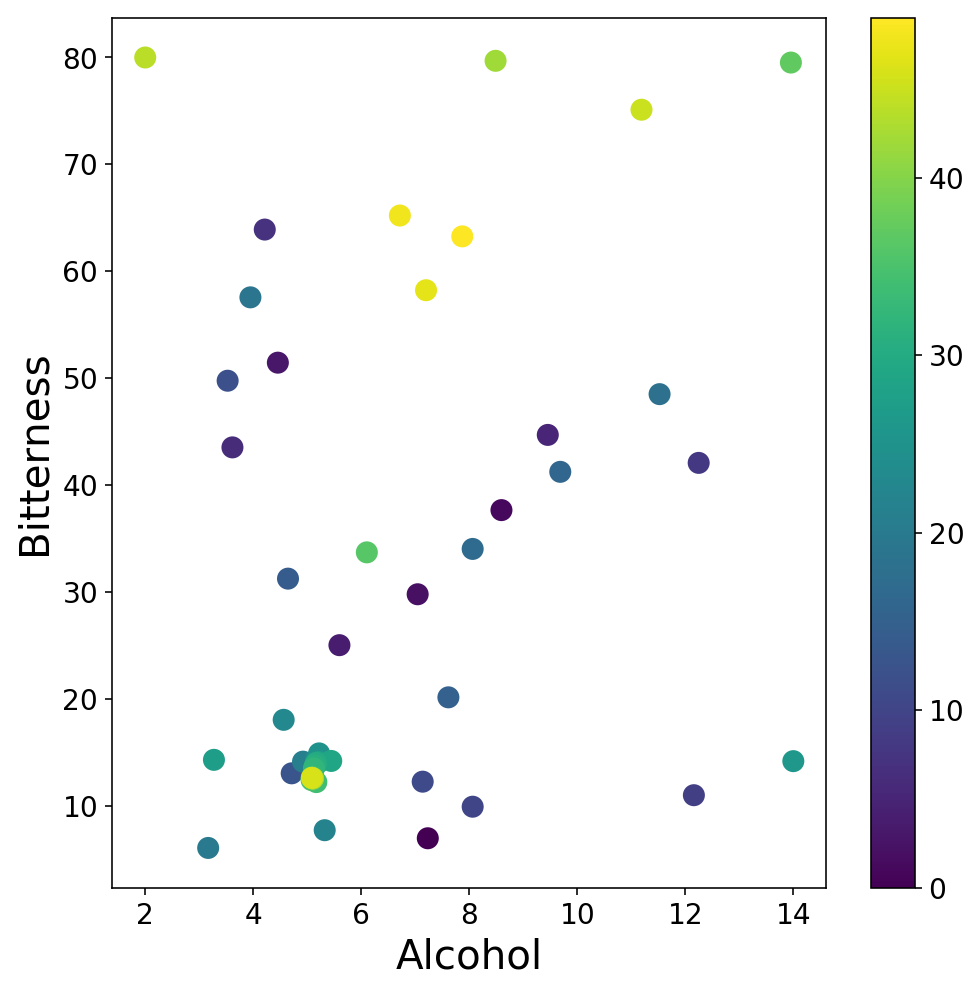

In [9]:
plt.scatter(*zip(*res.x_iters), c=range(len(res.x_iters)))
plt.xlabel('Alcohol')
plt.ylabel("Bitterness")
plt.colorbar();

---

# The big reveal

Let's finally look at the true shape of our objective function. In a real world setting you do not have this luxury.

In [10]:
h = 0.02
xx, yy = np.meshgrid(np.arange(2, 14, h),
                     np.arange(5, 80, h))
Z = inverse_beer_score(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

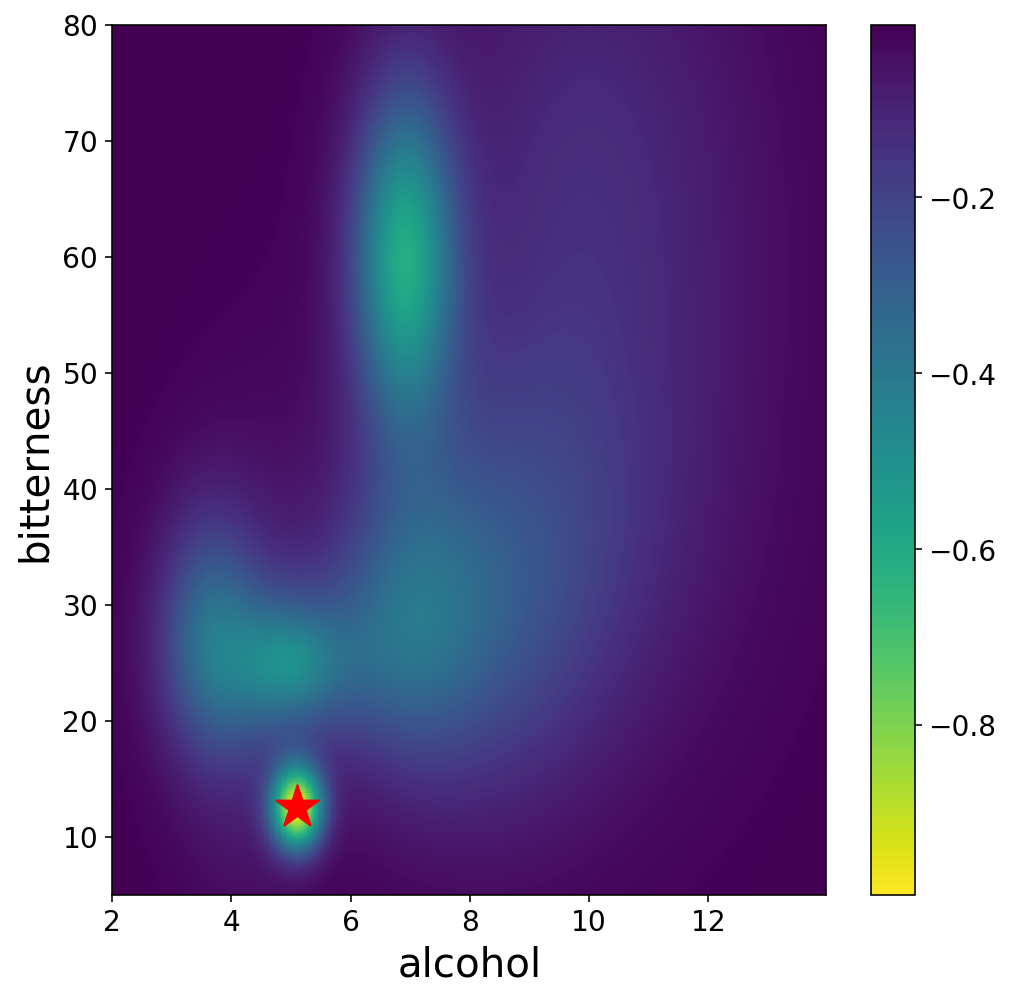

In [11]:
plt.pcolormesh(xx, yy, Z, cmap='viridis_r')
plt.colorbar();

plt.scatter(*res.x, marker="*", color='r', s=500)
plt.ylabel('bitterness')
plt.xlabel('alcohol');